In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from Bio import SeqIO
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_bacteria = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/results/df_bacteria_filtered.csv', index_col=0)

In [2]:
files = glob.glob('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/batch_tables/*/*.viral.csv')

dataframes = []
for file in files:
    batch = {}
    df = pd.read_csv(file, index_col=0)
    for idx in df.columns:
        batch[idx] = os.path.basename(file).replace('.viral.csv', '')
    df = pd.concat([pd.DataFrame(batch, index=[0]), df], axis=0)
    dataframes.append(df)
df = pd.concat(dataframes, axis=1)
df.rename(index={0: 'batch'}, inplace=True)

batch = df.loc['batch']
batch = batch.drop('pop_average', axis=0)

df_copy = df.drop('pop_average', axis=1)
columns = []
for col, source, fam in zip(df_copy.columns.values, df_copy.loc['seq_source'].values, df_copy.loc['family'].values):
    columns.append(f'{col} - {source} - {fam}')
df_copy = df_copy.drop(['seq_source', 'family', 'relationship', 'batch'], axis=0)
    
cols = df_copy.columns
# df_copy[cols] = df_copy[cols].astype(np.float)
df_copy = df_copy.astype(np.float)
    
df_copy.columns = columns
df_copy.T.head()

,VIRL|gi|9626372|ref|NC_001422.1|,VIRL|gi|51874225|ref|NC_001716.2|,VIRL|gi|9633069|ref|NC_000898.1|,VIRL|gi|9627742|ref|NC_001623.1|,VIRL|gi|131840030|ref|NC_009127.1|,VIRL|gi|9626243|ref|NC_001416.1|,VIRL|gi|114680053|ref|NC_008349.1|,VIRL|gi|9626692|ref|NC_001479.1|,VIRL|gi|139424470|ref|NC_009334.1|,VIRL|gi|124378202|ref|NC_008912.1|,...,VIRL|gi|227811306|ref|NC_004462.2|,VIRL|gi|190151415|ref|NC_010945.1|,VIRL|gi|31543997|ref|NC_004827.1|,VIRL|gi|9629524|ref|NC_001825.1|,VIRL|gi|285002275|ref|NC_013772.1|,VIRL|gi|73912684|ref|NC_007376.1|,VIRL|gi|9629357|ref|NC_001802.1|,VIRL|gi|281416434|ref|NC_013644.1|,VIRL|gi|239507361|ref|NC_012784.1|,VIRL|gi|66396406|ref|NC_007064.1|
03C23190 - LCL - AU1157,2112272.0,0.0,0.0,24.0,17.0,17.0,14.0,6.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,2072532.0,0.0,0.0,25.0,25.0,9.0,6.0,7.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,2123414.0,0.0,0.0,30.0,30.0,12.0,8.0,8.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,2059062.0,2.0,0.0,26.0,21.0,17.0,6.0,9.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,2405093.0,2.0,0.0,30.0,26.0,10.0,12.0,7.0,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
phage_list = []
for record in SeqIO.parse("/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/bacteriophage/sequences.fasta", "fasta"):
    phage_list.append(record.id)

In [4]:
phage_present = [phage for phage in phage_list if phage in df_copy.T.columns]
print(len(phage_present))

14


In [5]:
df_phage = df_copy.T.loc[:, phage_present]
contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
columns = []
for idx in df_phage.columns:
    columns.append(contig_df.loc[idx].short_des)
df_phage.columns = columns
df_phage.fillna(0., inplace=True)
df_phage = df_phage.loc[:, [phage for phage in df_phage.columns if df_phage[phage].max(axis=0) >= 10]]
df_phage.head(2)

,Rhodococcus phage Whack
03C23190 - LCL - AU1157,0.0
03C23194 - WB - AU1157,0.0


<AxesSubplot:>

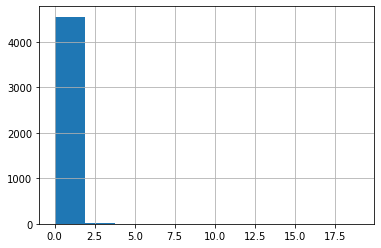

In [6]:
df_phage.iloc[:, 0].hist()

In [7]:
df_phage.iloc[:, 0].describe()

count    4568.000000
mean        0.026270
std         0.496726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: Rhodococcus phage Whack, dtype: float64

In [10]:
for phage in df_phage.columns:
    for bacteria in df_bacteria.columns:
        corr, pval = spearmanr(df_phage[phage], df_bacteria[bacteria])
        if pval < 0.05:
            print(f'{phage}\t{bacteria}\tcorrelation coefficient:{corr}\tp-value:{pval}')

Rhodococcus phage Whack	Achromobacter piechaudii	correlation coefficient:-0.06531474340493393	p-value:9.96479610674117e-06
Rhodococcus phage Whack	Acidovorax JS42	correlation coefficient:0.042795509204131145	p-value:0.0038163841392648123
Rhodococcus phage Whack	Acidovorax ebreus TPSY	correlation coefficient:0.05400366151492537	p-value:0.0002606011892328813
Rhodococcus phage Whack	Acinetobacter RUH2624	correlation coefficient:-0.03437600633613893	p-value:0.02015653175524669
Rhodococcus phage Whack	Acinetobacter baumannii AB059	correlation coefficient:-0.031207964019014923	p-value:0.034928311885161996
Rhodococcus phage Whack	Acinetobacter baumannii AYE	correlation coefficient:-0.03243082884841812	p-value:0.028388283889026693
Rhodococcus phage Whack	Acinetobacter johnsonii SH046	correlation coefficient:-0.032214275395862864	p-value:0.029463053505103847
Rhodococcus phage Whack	Acinetobacter lwoffii SH145	correlation coefficient:-0.0386001186197513	p-value:0.009077439127510868
Rhodococcus p

Rhodococcus phage Whack	Salmonella enterica enterica	correlation coefficient:0.029269511423126244	p-value:0.047915137746380655
Rhodococcus phage Whack	Sanguibacter keddieii 10542	correlation coefficient:0.05571321531794398	p-value:0.0001649673796991832
Rhodococcus phage Whack	Serratia proteamaculans 568	correlation coefficient:0.03889268720524184	p-value:0.008565788908403715
Rhodococcus phage Whack	Shigella flexneri 2002017	correlation coefficient:0.04568333734035008	p-value:0.002012603070296513
Rhodococcus phage Whack	Shigella flexneri 2a	correlation coefficient:0.042674054274965734	p-value:0.003917430067993953
Rhodococcus phage Whack	Sphingomonas SKA58 1100007010408	correlation coefficient:0.04427277320440539	p-value:0.0027632975904768797
Rhodococcus phage Whack	Sphingomonas SKA58 1100007010439	correlation coefficient:0.030630129819309126	p-value:0.03844137746160769
Rhodococcus phage Whack	Staphylococcus epidermidis SK135	correlation coefficient:-0.031407983145697524	p-value:0.033777

/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
